In [1]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
#import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

#import misc_util#correlation_plots

import R2h_module
#import imp
#imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

In [2]:
def getdatainChunks(filename,treename):
    import pickle
    with open(filename, 'rb') as f:
        return pickle.load(f)[treename]

In [4]:
import ROOT
f=ROOT.TFile("low_energy_protons/C_data_hadd.root")

Welcome to JupyROOT 6.27/01


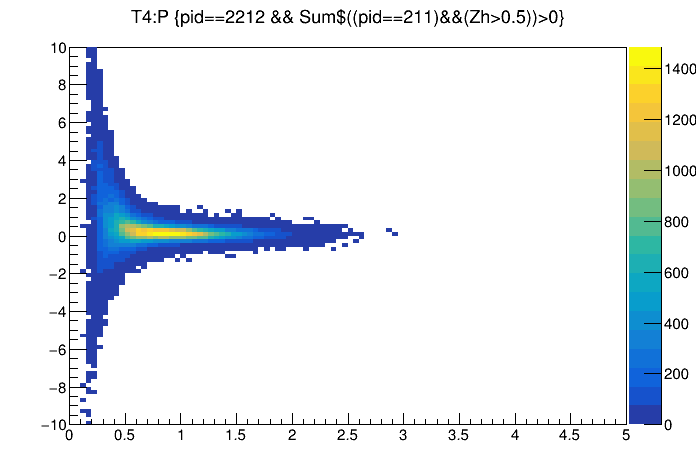

In [32]:
c=ROOT.TCanvas()
f.ntuple_data.Draw("T4:P>>h(100, 0, 5, 100,-10,10)","pid==2212 && Sum$((pid==211)&&(Zh>0.5))>0","COLZ")
c.Draw()

Info in <TCanvas::Print>: pdf file images/proton_PID_with_leading_pip.pdf has been created


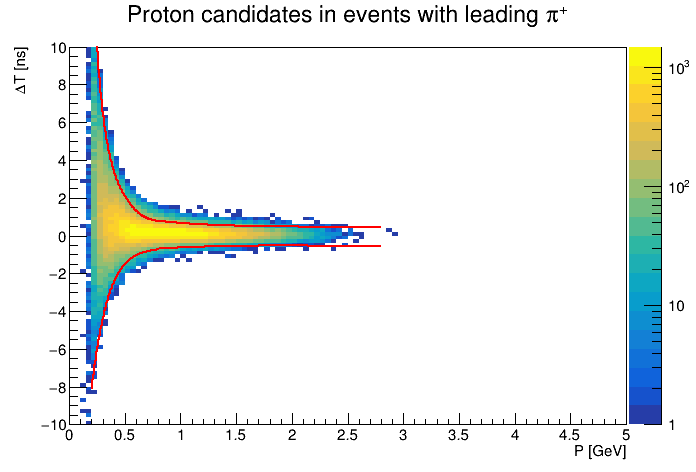

In [40]:
ROOT.gStyle.SetOptStat(0)
c.SetLogz()

f.ntuple_data.GetHistogram().SetTitle("Proton candidates in events with leading #pi^{+};P [GeV];#DeltaT [ns];events")
f.ntuple_data.GetHistogram().Draw("COLZ")

coeffs_high_range1=120.251,-1168.19,5237.42,-13638.1,22325.3,-23649.6,16177.8,-6894.16,1663.4,-173.474
coeffs_low_range1=-26.8257,153.155,-408.979,673.476,-790.433,708.255,-474.843,217.295,-58.6269,6.90981
coeffs_high_range2=1.59223,-1.49056,0.676338,-0.104644
coeffs_low_range2=-1.1009,0.719988,-0.280016,0.0319352

#draw function based on Or's polynomials
fnc1=ROOT.TF1('f1', "pol3", 0.8,2.8)
fnc1.SetParameters(-1.1009,0.719988,-0.280016,0.0319352)
fnc1.SetLineColor(ROOT.kRed)
fnc1.Draw("SAME")

fnc2=ROOT.TF1('f2', "pol3", 0.8,2.8)
fnc2.SetParameters(1.59223,-1.49056,0.676338,-0.104644)
fnc2.SetLineColor(ROOT.kRed)
fnc2.Draw("SAME")

fnc3=ROOT.TF1('f3', "pol9", 0.2, 0.8)
fnc3.SetParameters(-26.8257,153.155,-408.979,673.476,-790.433,708.255,-474.843,217.295,-58.6269,6.90981)
fnc3.SetLineColor(ROOT.kRed)
fnc3.Draw("SAME")

fnc4=ROOT.TF1('f4', "pol9", 0.2, 0.8)
fnc4.SetParameters(120.251,-1168.19,5237.42,-13638.1,22325.3,-23649.6,16177.8,-6894.16,1663.4,-173.474)
fnc4.SetLineColor(ROOT.kRed)
fnc4.Draw("SAME")
#df['pass_proton_TOF_cut']=((p>0.2)&(p<0.8)&(T4<poly(p,coeffs_high_range1))&(T4>poly(p,coeffs_low_range1)))|\
#              ((p>=0.8)&(p<2.8)&(T4<poly(p,coeffs_high_range2))&(T4>poly(p,coeffs_low_range2))) 

c.Draw()
c.SaveAs("images/proton_PID_with_leading_pip.pdf")

In [17]:
help(fnc)

Help on TF1 in module ROOT._facade object:

class TF1(TNamed, TAttLine, TAttFill, TAttMarker)
 |  cppyy object proxy (internal)
 |  
 |  Method resolution order:
 |      TF1
 |      TNamed
 |      TObject
 |      TAttLine
 |      TAttFill
 |      TAttMarker
 |      CPPInstance
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AbsValue(...)
 |      static void TF1::AbsValue(bool reject = kTRUE)
 |  
 |  AddParameter(...)
 |      void TF1::AddParameter(const TString& name, double value)
 |  
 |  AddToGlobalList(...)
 |      bool TF1::AddToGlobalList(bool on = kTRUE)
 |  
 |  Browse(...)
 |      void TF1::Browse(TBrowser* b)
 |  
 |  CalcGaussLegendreSamplingPoints(...)
 |      static void TF1::CalcGaussLegendreSamplingPoints(int num, double* x, double* w, double eps = 3.0E-11)
 |  
 |  CentralMoment(...)
 |      double TF1::CentralMoment(double n, double a, double b, const double* params = 0, double epsilon = 9.9999999999999995E-7)
 |  
 |  Class(...)
 |      static TClass*